In [1]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
model = YOLO('best.pt')

In [3]:
img = cv2.imread(r'/Users/abdulshaik/Desktop/Watch Tower/AFIA/IMG_7581.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
img2 = cv2.imread(r'/Users/abdulshaik/Desktop/Watch Tower/AFIA/Screen Shot 2025-03-09 at 1.23.33 PM.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

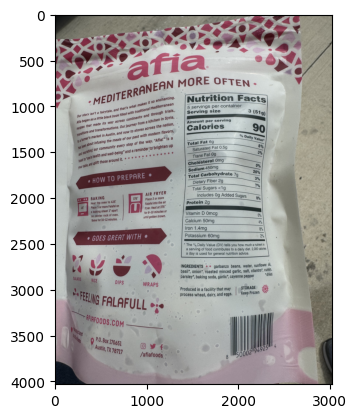

In [12]:
plt.imshow(img)

In [11]:
results = model.predict(source=img2, conf=0.1)
for result in results:
    result.show()


0: 640x512 4 dates, 260.7ms
Speed: 43.9ms preprocess, 260.7ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 512)


In [22]:
from tkinter import messagebox
import tkinter as tk

def check_image_predictions(model, image):
    # Make prediction with low confidence threshold
    results = model.predict(source=image, conf=0.5)
    
    # Create root window but keep it hidden
    root = tk.Tk()
    root.withdraw()
    
    if len(results[0].boxes) == 0:
        # Show warning popup for no date
        messagebox.showwarning(
            title="Detection Result",
            message="DATE NOT FOUND",
            parent=root
        )
    else:
        # Show success popup for date found
        messagebox.showinfo(
            title="Detection Result",
            message="DATE FOUND",
            parent=root
        )
    
    # Cleanup
    root.destroy()
    return results


# Example usage:
# model = YOLO('your_model.pt')
# img_path = 'path/to/image.jpg'
# results = check_image_predictions(model, img_path)

In [ ]:
results = check_image_predictions(model, img)


0: 640x480 (no detections), 239.4ms
Speed: 9.8ms preprocess, 239.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


: 

In [6]:
back = cv2.imread('back.png')
fore = cv2.imread('fore.png')

In [ ]:
back = cv2.imread('back.png')
fore = cv2.imread('fore.png')
bg_gray = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)
img_gray = cv2.cvtColor(fore, cv2.COLOR_BGR2GRAY)
 #Resize bg_gray to match img_gray dimensions if needed
if bg_gray.shape != img_gray.shape:
    bg_gray = cv2.resize(bg_gray, (img_gray.shape[1], img_gray.shape[0]))

# Compute the absolute difference
diff = cv2.absdiff(bg_gray, img_gray)
_, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)  # Create a binary mask
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 6: Analyze the object
if len(contours) > 0:
    # Find the largest contour (assumed to be the object)
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Extract the region of interest (ROI) with the object
    roi = fore[y:y+h, x:x+w]
    
    # Display the detected object
    cv2.imshow('Detected Object', roi)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    print("Object detected")
else:
    print("No object detected")



In [7]:
bg_gray = cv2.cvtColor(back, cv2.COLOR_BGR2GRAY)
img_gray = cv2.cvtColor(fore, cv2.COLOR_BGR2GRAY)

In [9]:
 #Resize bg_gray to match img_gray dimensions if needed
if bg_gray.shape != img_gray.shape:
    bg_gray = cv2.resize(bg_gray, (img_gray.shape[1], img_gray.shape[0]))

# Compute the absolute difference
diff = cv2.absdiff(bg_gray, img_gray)

In [11]:
_, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)  # Create a binary mask

In [12]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Step 6: Analyze the object
if len(contours) > 0:
    # Find the largest contour (assumed to be the object)
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Extract the region of interest (ROI) with the object
    roi = fore[y:y+h, x:x+w]
    
    # Display the detected object
    cv2.imshow('Detected Object', roi)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    print("Object detected")
else:
    print("No object detected")

In [ ]:
cv2.imshow('Difference', diff)
cv2.imshow('Threshold', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()